In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

Importing Dataset

In [7]:
df = pd.read_csv('Loan_Data.csv', sep =",")

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
(df.isnull().sum()/len(df)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Data Analysis

Heatmap: Correlation between variables

C:\Users\Adan Cabildo\AppData\Local\Temp\ipykernel_7628\4054051414.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr().round(2)


<AxesSubplot: >

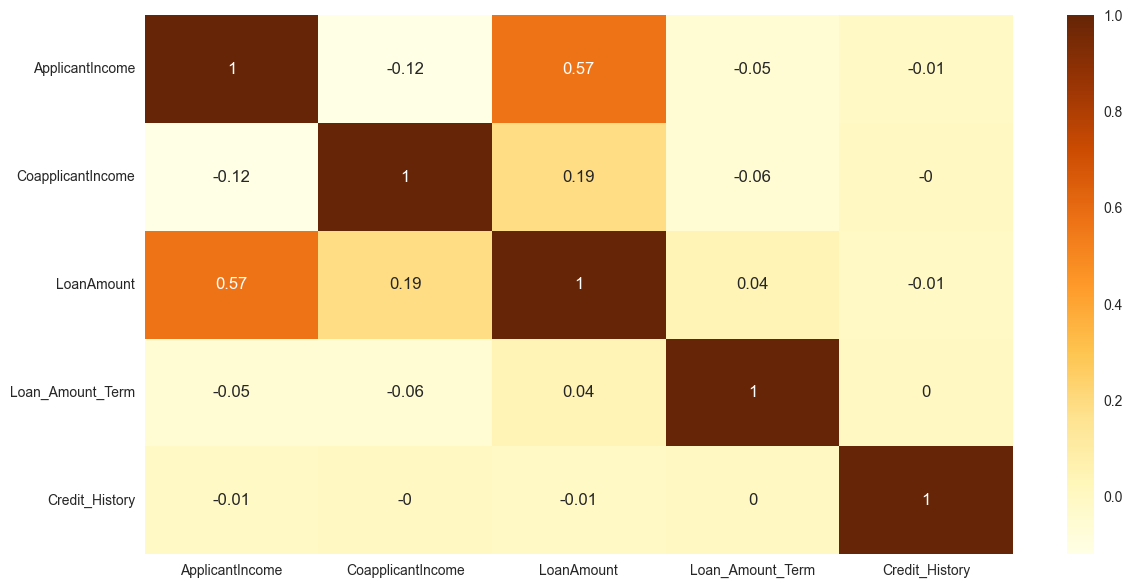

In [14]:
correlation = df.corr().round(2)
plt.figure(figsize = (14, 7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

Data visualization of variables

There are more Male applicant than Female.

<AxesSubplot: xlabel='Gender', ylabel='count'>

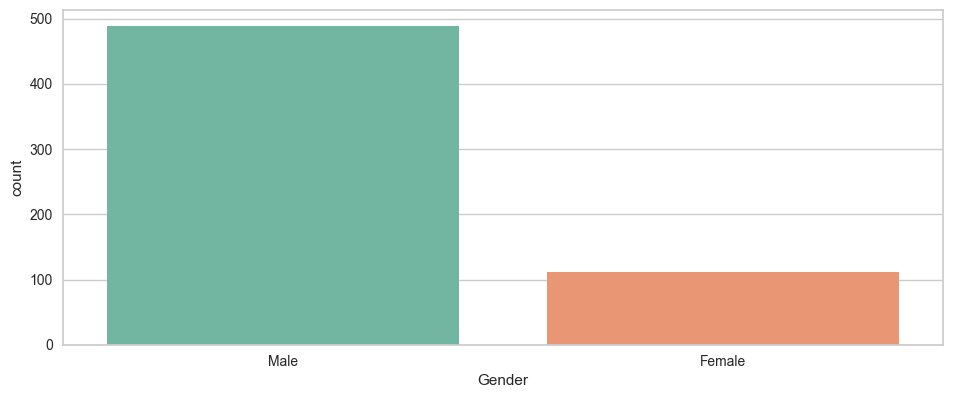

In [15]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Gender', palette ='Set2', data = df)

There are more Married applicants than Not Married.

<AxesSubplot: xlabel='Married', ylabel='count'>

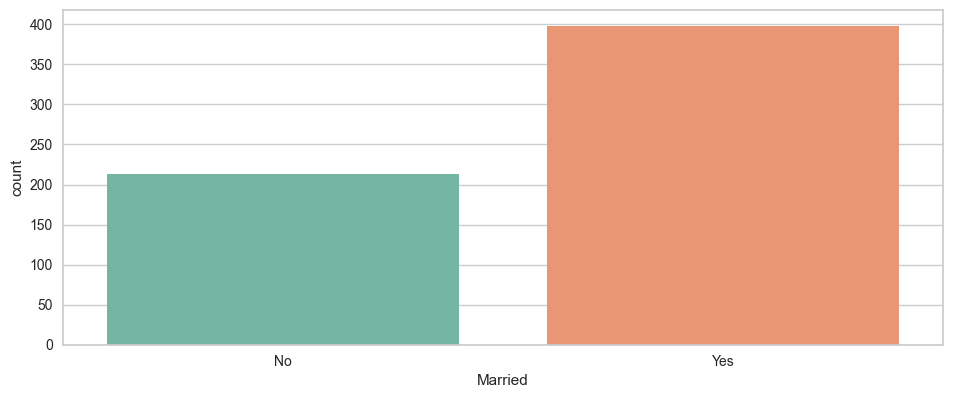

In [16]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Married', palette = 'Set2', data = df)

There are more applicants that has no dependents.

<AxesSubplot: xlabel='Dependents', ylabel='count'>

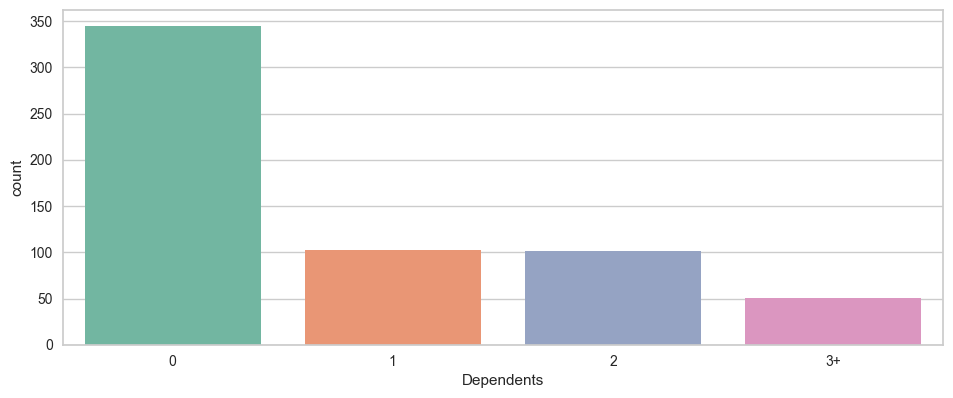

In [17]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Dependents', palette = 'Set2', data = df)

There are more Graduate applicants than Not Graduate.

<AxesSubplot: xlabel='Education', ylabel='count'>

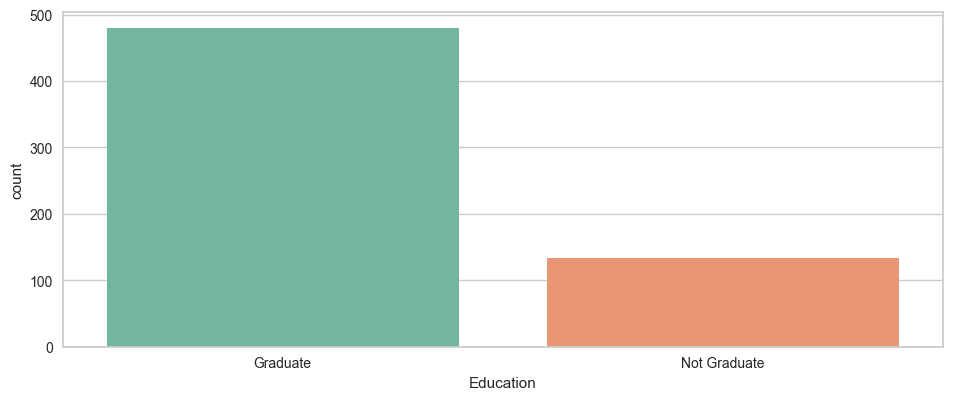

In [18]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Education', palette = 'Set2', data = df)

There are more applicants that is NOT Self Employed than Self Employed.

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

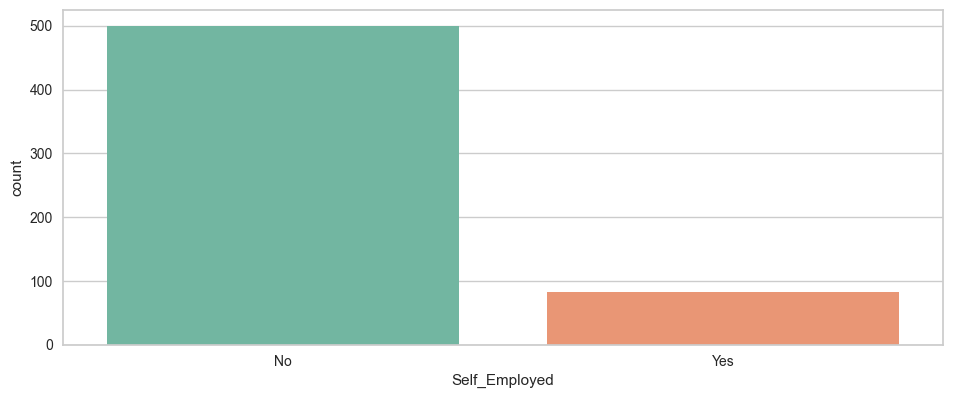

In [19]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Self_Employed', palette = 'Set2', data = df)

Data visualization of Property Type. Semiurban has the largest value.

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

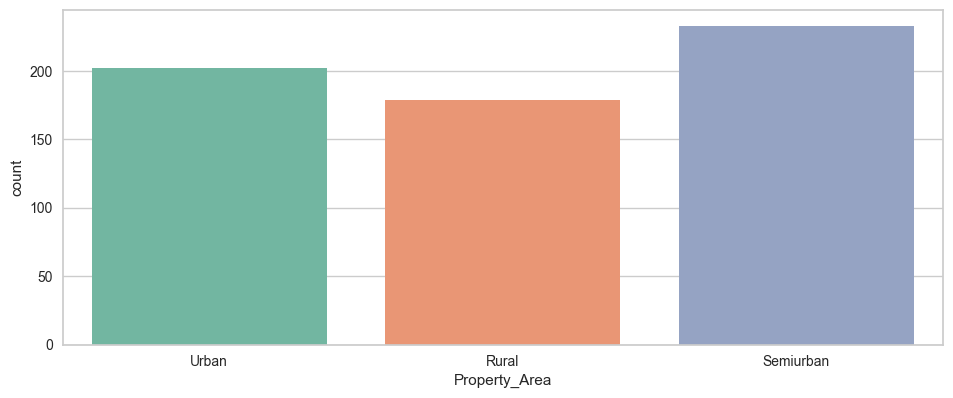

In [20]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Property_Area', palette = 'Set2', data = df)

There are more accepted loan than rejection.

<AxesSubplot: xlabel='Loan_Status', ylabel='count'>

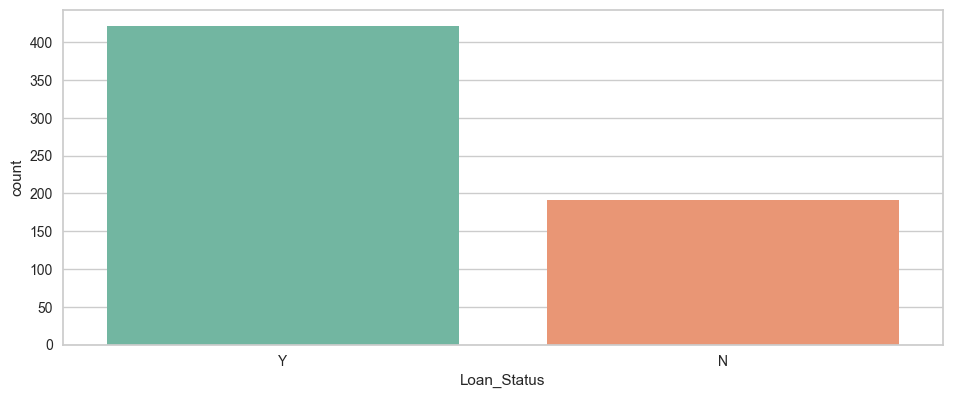

In [21]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Loan_Status', palette = 'Set2', data = df)

There are more applicants who meets the credit guidelines than applicants who does not.

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

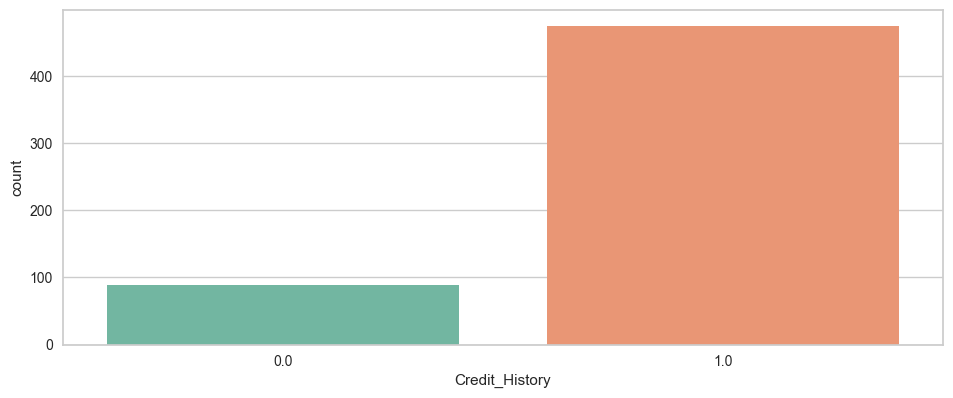

In [22]:
plt.figure(figsize = (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Credit_History', palette = 'Set2', data = df)

Continuous Variables

<AxesSubplot: xlabel='ApplicantIncome', ylabel='Count'>

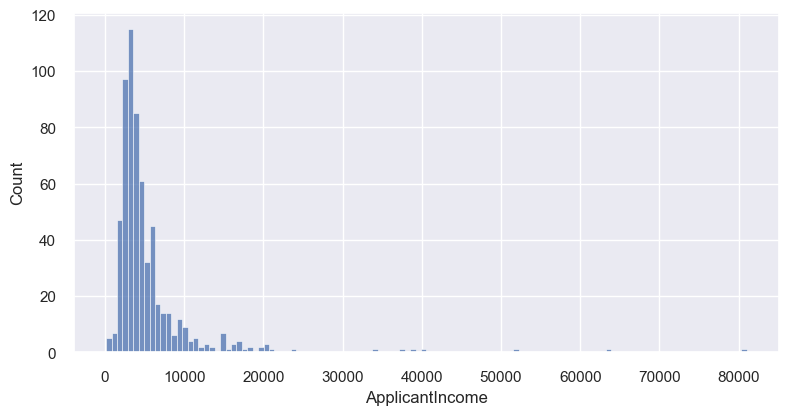

In [23]:
plt.figure(figsize = (20, 15))
sns.set(color_codes = True)

plt.subplot(3, 2, 1)
sns.histplot(df['ApplicantIncome'], kde = False)


<AxesSubplot: xlabel='CoapplicantIncome', ylabel='Count'>

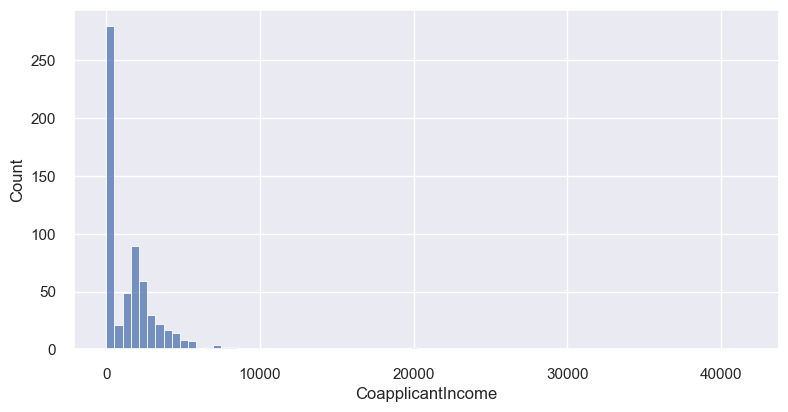

In [24]:
plt.figure(figsize = (20, 15))
sns.set(color_codes = True)

plt.subplot(3, 2, 1)
sns.histplot(df['CoapplicantIncome'], kde = False)


<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

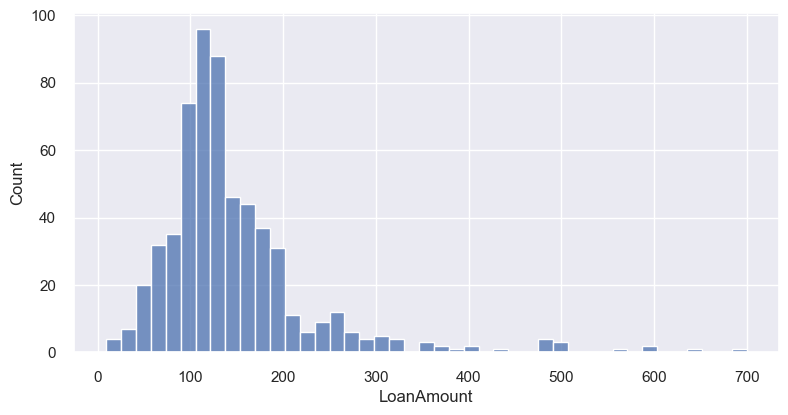

In [25]:
plt.figure(figsize = (20, 15))
sns.set(color_codes = True)

plt.subplot(3, 2, 1)
sns.histplot(df['LoanAmount'], kde = False)


<AxesSubplot: xlabel='Loan_Amount_Term', ylabel='Count'>

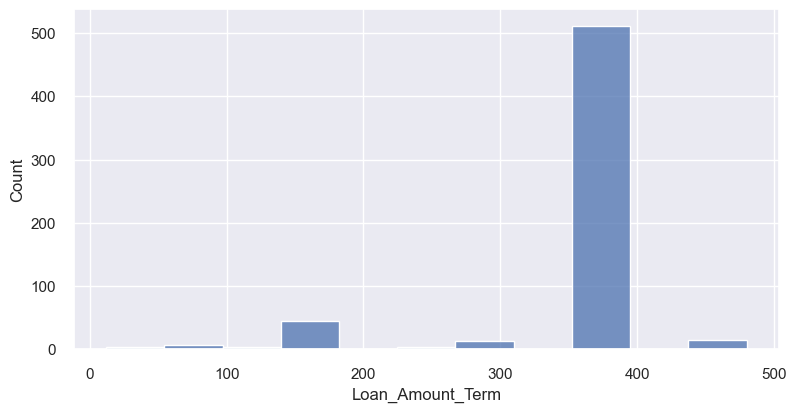

In [26]:
plt.figure(figsize = (20, 15))
sns.set(color_codes = True)

plt.subplot(3, 2, 1)
sns.histplot(df['Loan_Amount_Term'], kde = False)

Boxplot to see outliers.

<AxesSubplot: xlabel='ApplicantIncome'>

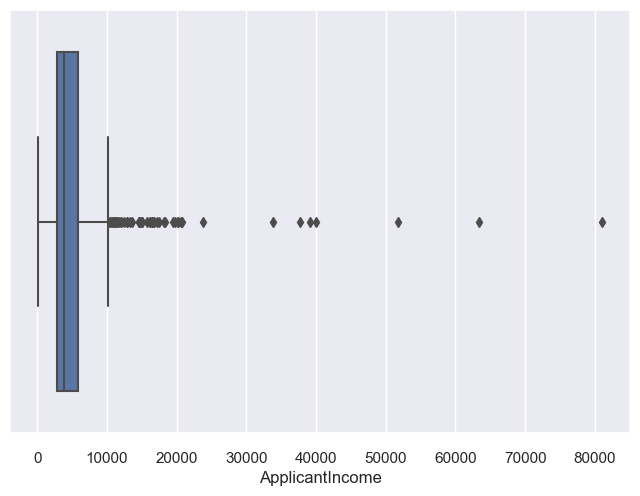

In [27]:
sns.boxplot(x =df['ApplicantIncome'])

<AxesSubplot: xlabel='CoapplicantIncome'>

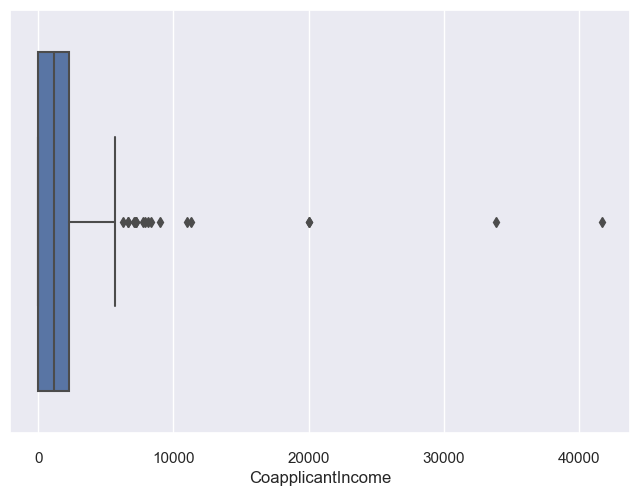

In [28]:
sns.boxplot(x =df['CoapplicantIncome'])

<AxesSubplot: xlabel='LoanAmount'>

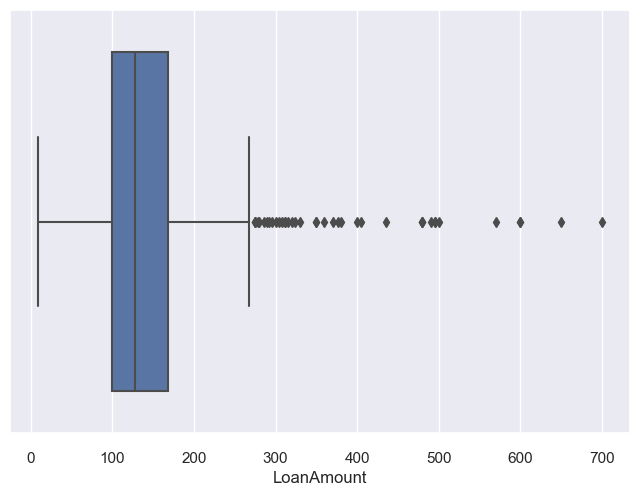

In [29]:
sns.boxplot(x =df['LoanAmount'])

Bivariate Analysis: Discrete Variables VS. Loan Status

<AxesSubplot: xlabel='Gender', ylabel='count'>

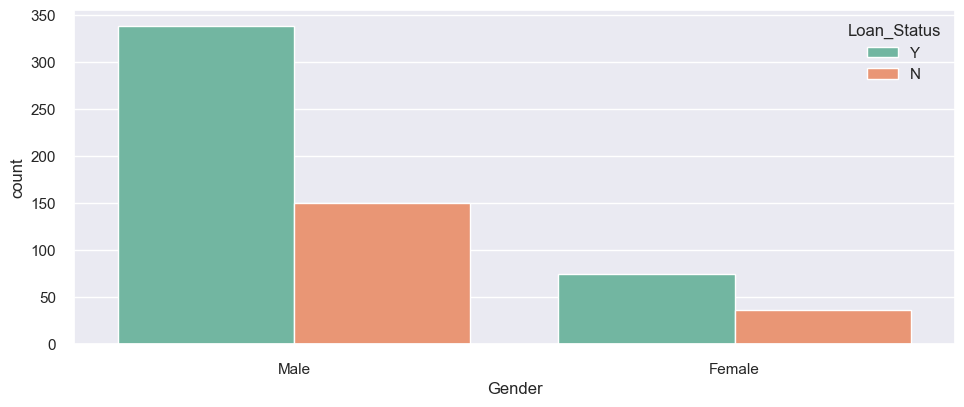

In [30]:
plt.figure(figsize= (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Married', ylabel='count'>

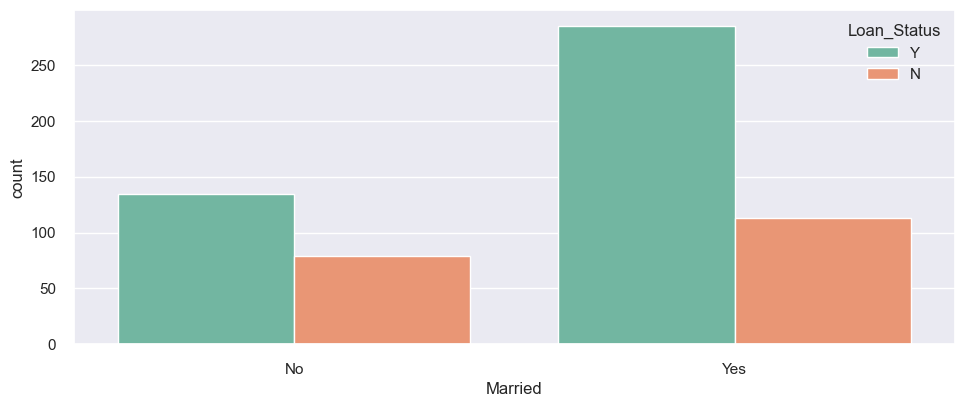

In [31]:
plt.figure(figsize= (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Married', hue = 'Loan_Status', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Dependents', ylabel='count'>

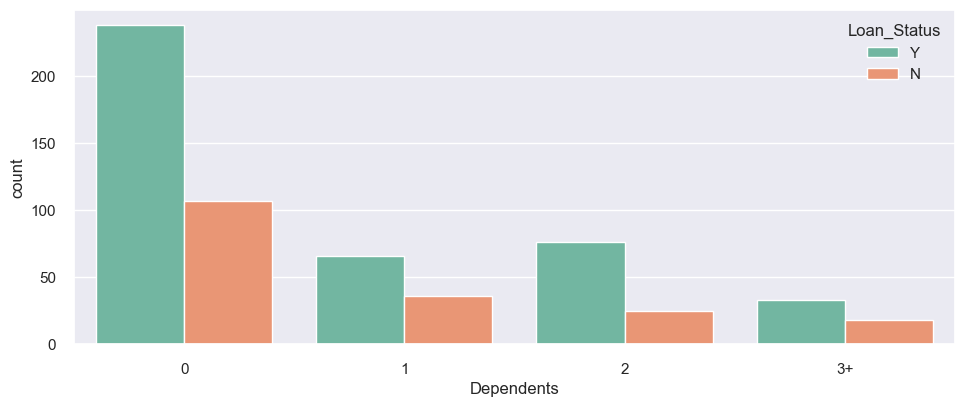

In [32]:
plt.figure(figsize= (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Education', ylabel='count'>

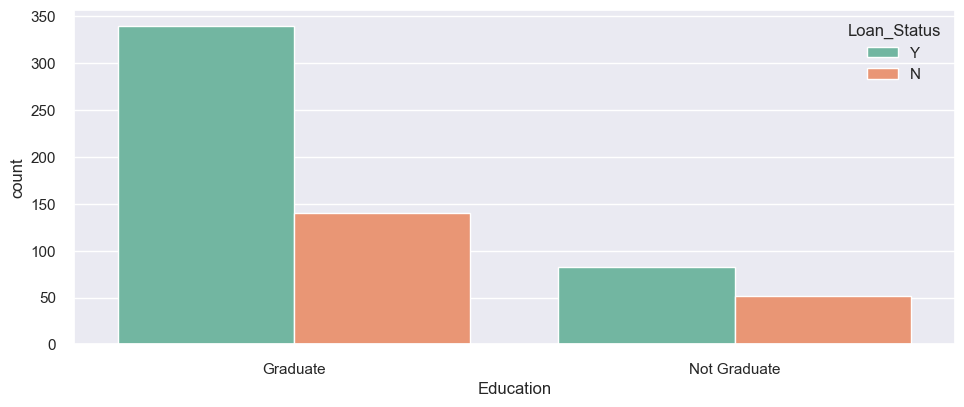

In [33]:
plt.figure(figsize= (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Self_Employed', ylabel='count'>

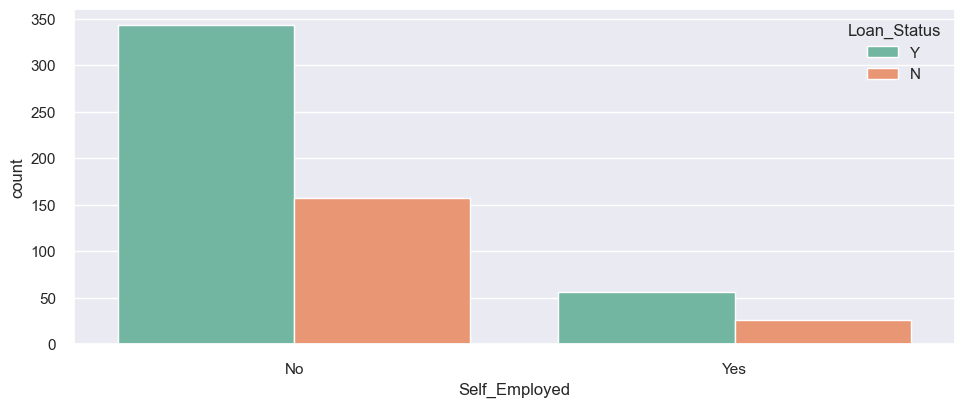

In [34]:
plt.figure(figsize= (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

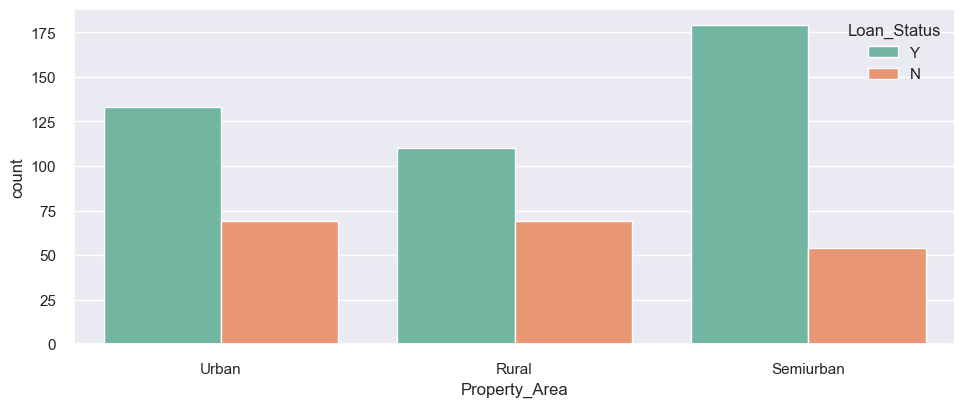

In [35]:
plt.figure(figsize= (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', palette = 'Set2', data = df)

<AxesSubplot: xlabel='Credit_History', ylabel='count'>

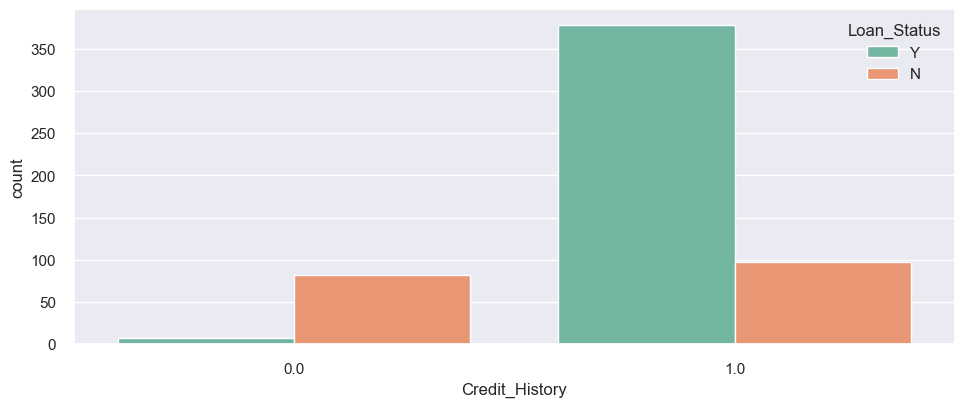

In [36]:
plt.figure(figsize= (25, 20))

plt.subplot(4, 2, 1)
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', palette = 'Set2', data = df)

Bivariate Analysis: Continuous Variables VS. Loan Status

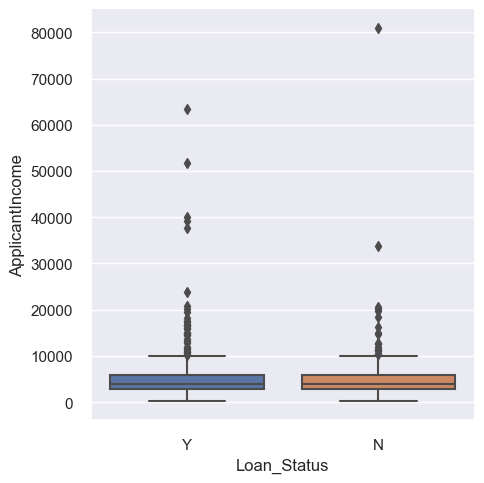

In [37]:
sns.catplot(x = 'Loan_Status', y = 'ApplicantIncome', kind = "box", data = df)

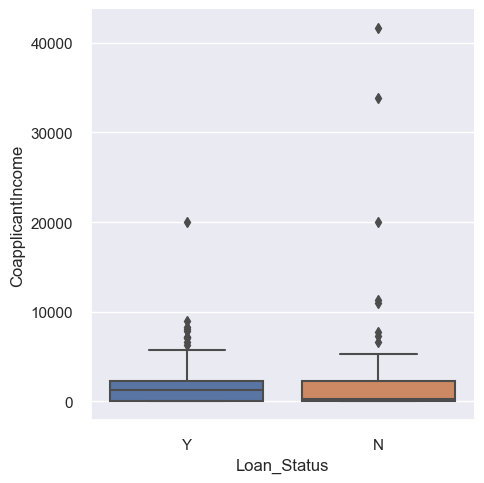

In [38]:
sns.catplot(x = 'Loan_Status', y = 'CoapplicantIncome', kind = "box", data = df)

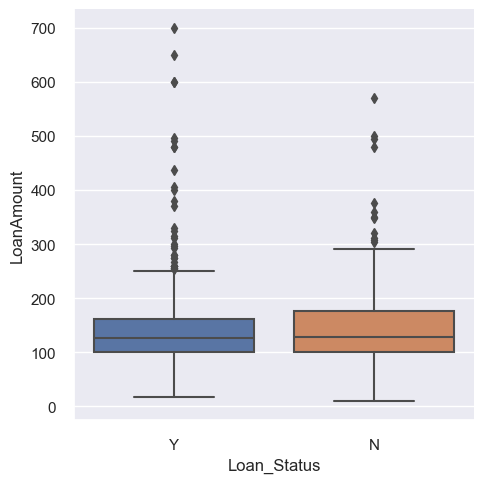

In [39]:
sns.catplot(x = 'Loan_Status', y = 'LoanAmount', kind = "box", data = df)

Pre-Processing: Cleaning of Data

In [40]:
(df.isnull().sum()/len(df)) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Remove null values of Credit History. We can not say that we have the applicant's credit history when we don't for the Credit History has a great impact for the Loan Status.

In [41]:
df = df[df['Credit_History'].notnull()]

Fill variables Gender, Married, Dependents, and Self_Employed with the Mode.

In [42]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

C:\Users\Adan Cabildo\AppData\Local\Temp\ipykernel_7628\3432820993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
C:\Users\Adan Cabildo\AppData\Local\Temp\ipykernel_7628\3432820993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
C:\Users\Adan Cabildo\AppData\Local\Temp\ipykernel_7628\3432820993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Fill the null variables of LoanAmount and Loan_Amount_Term with the Mean.

In [43]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

C:\Users\Adan Cabildo\AppData\Local\Temp\ipykernel_7628\1838336641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
C:\Users\Adan Cabildo\AppData\Local\Temp\ipykernel_7628\1838336641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())


Check if null values still exist.

In [44]:
(df.isnull().sum()/len(df)) * 100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

Model Building

In [45]:
df = df.drop('Loan_ID', axis = 1)

In [46]:
X = df.drop('Loan_Status', axis = 1)

In [47]:
X = X.values

In [48]:
y = df['Loan_Status']

Balancing Class: to make the classes balanced. For accuracy purposes.

In [49]:
from imblearn.over_sampling import RandomOverSampler 

In [50]:
ros = RandomOverSampler(random_state=0)

In [51]:
X, y = ros.fit_resample(X, y)

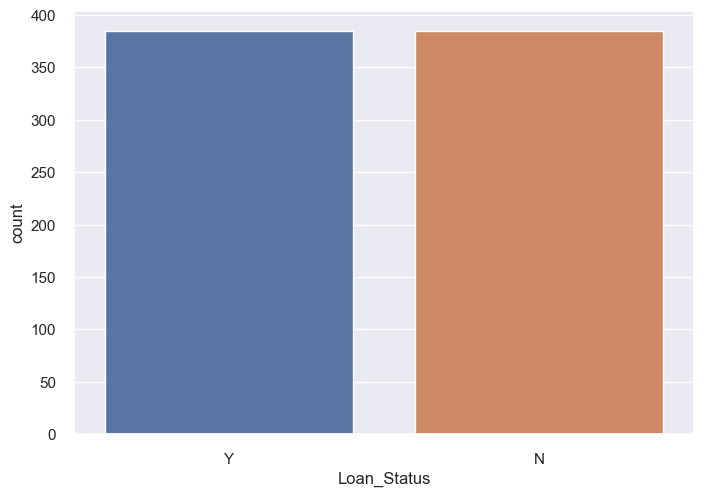

In [52]:
ax = sns.countplot(x = y)

Label Encoder: Transforms categorical variables into numeric variables.

In [53]:
from sklearn.preprocessing import LabelEncoder

In [58]:
label_encoder_Gender = LabelEncoder()
label_encoder_Married = LabelEncoder()
label_encoder_Dependents = LabelEncoder()
label_encoder_Education = LabelEncoder()
label_encoder_Self_Employed = LabelEncoder()
label_encoder_Property_Area = LabelEncoder()
label_encoder_Loan_Status = LabelEncoder()

In [59]:
X[:, 0] = label_encoder_Gender.fit_transform(X[:, 0])
X[:, 1] = label_encoder_Married.fit_transform(X[:, 1])
X[:, 2] = label_encoder_Dependents.fit_transform(X[:, 2])
X[:, 3] = label_encoder_Education.fit_transform(X[:, 3])
X[:, 4] = label_encoder_Self_Employed.fit_transform(X[:, 4])
X[:, 10] = label_encoder_Property_Area.fit_transform(X[:, 10])
y = label_encoder_Gender.fit_transform(y)

StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Transforming data into Train and Test. 30% of data will be used to test the model.

In [61]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.25, random_state=0)

In [84]:
X_train.shape, y_train.shape

((577, 11), (577,))

In [85]:
X_test.shape, y_test.shape

((193, 11), (193,))

Logistic Regression Model

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logistic = LogisticRegression(random_state=16, max_iter = 1000)

In [132]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [133]:
y_pred = logistic.predict(X_test)

Normal Data

0.7046632124352331

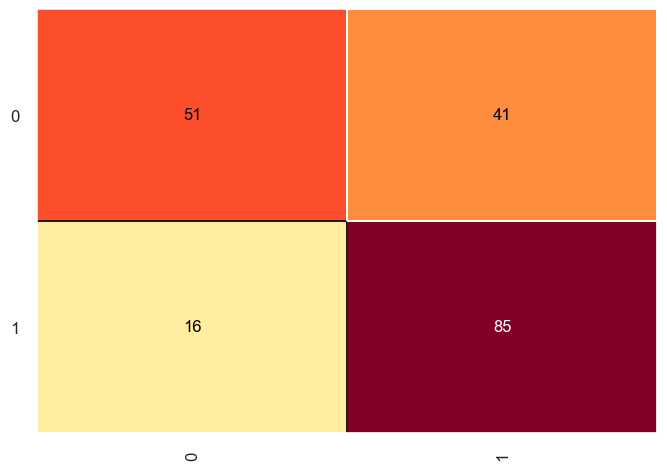

In [134]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [135]:
target_names = ['Loan Status = N', 'Loan Status = Y']
logistic_normal = (classification_report(y_test, y_pred, target_names=target_names))

In [136]:
print(logistic_normal)

                 precision    recall  f1-score   support

Loan Status = N       0.76      0.55      0.64        92
Loan Status = Y       0.67      0.84      0.75       101

       accuracy                           0.70       193
      macro avg       0.72      0.70      0.70       193
   weighted avg       0.72      0.70      0.70       193



Prediction Visualization using simple Matrix

In [137]:
from sklearn import metrics

In [138]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[51, 41],
       [16, 85]], dtype=int64)

Prediction Visualization using Heatmap

Text(0.5, 489.55555555555554, 'Predicted label')

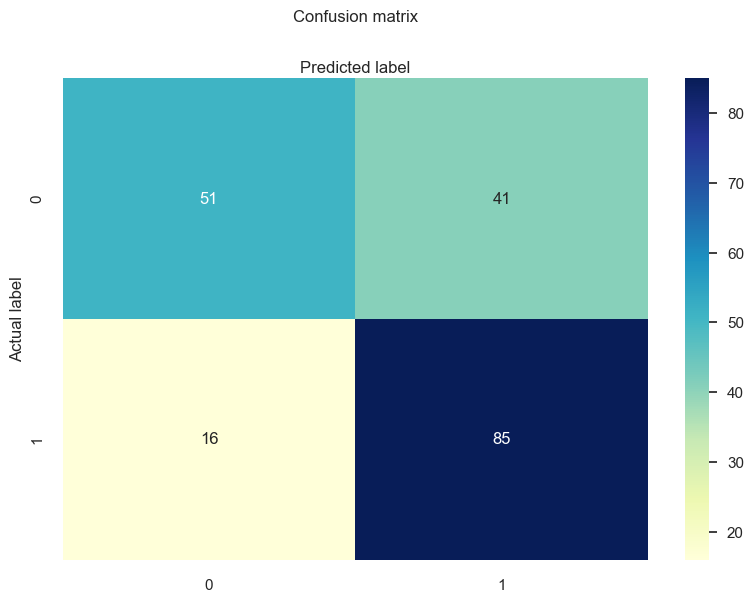

In [139]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

END

References: 
- https://www.datacamp.com/tutorial/understanding-logistic-regression-python 
- https://www.kaggle.com/code/raphaelmarconato/loan-eligibility-eda-balancing-and-ml-85/notebook#-4.-Model-Building.- 